***Sentiment Analysis: It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics***.

In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import os
import tweepy as tw

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.patches as mpatches
%matplotlib inline
pd.options.plotting.backend = 'plotly'

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Twitter_Data.csv')
df.head()

clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

In [7]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

**Drop missing rows**

In [8]:
df.dropna(axis = 0, inplace = True)

**Dimensionality of data**

In [9]:
df.shape

(162969, 2)

**Map tweet categories**

In [10]:
df['category'] = df['category'].map({-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'})
df.head()

clean_text  category
0  when modi promised “minimum government maximum...  Negative
1  talk all the nonsense and continue all the dra...   Neutral
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Positive
4  answer who among these the most powerful world...  Positive

**Distribution of sentiments**

In [11]:
df.groupby('category').count().plot(kind = 'bar')

**Distribution of tweet lengths**

In [12]:
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_text']])
tweet_len.plot(kind = 'box')

**Distribution of text length for positive sentiment tweets**

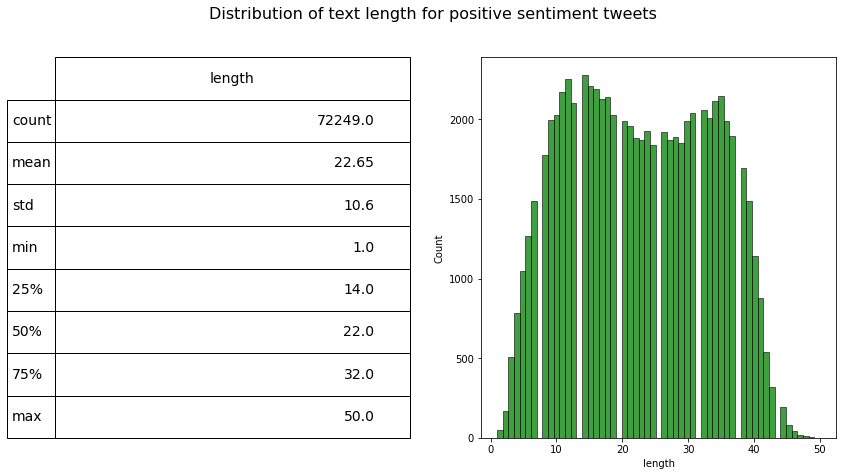

In [13]:
fig = plt.figure(figsize = (14, 7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category'] == 'Positive']['length'], ax = ax1, color = 'green')
describe = df.length[df.category == 'Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox = bbox, colLabels = describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets', fontsize = 16)
plt.show()

**Distribution of text length for negative sentiment tweets**

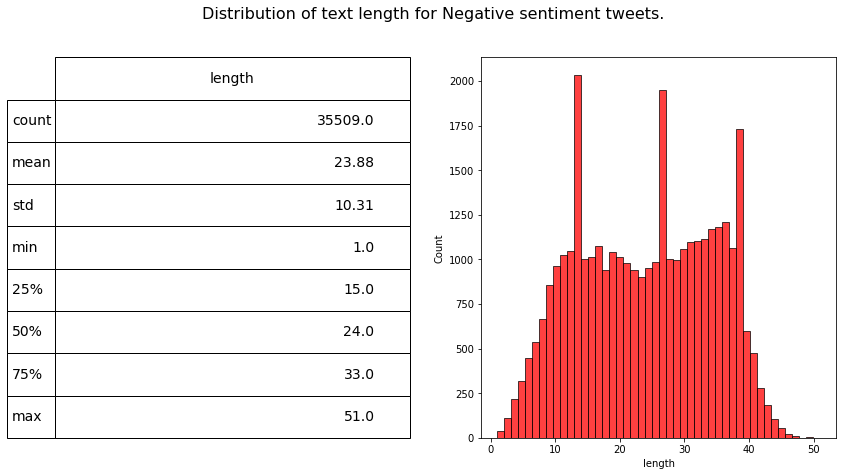

In [14]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

**Pie chart of the percentage of different sentiments of all the tweets**

In [15]:
fig = px.pie(df, names = 'category', title = 'Pie chart of different sentiments of tweets')
fig.show()

In [16]:
df.drop(['length'], axis = 1, inplace = True)
df.head

<bound method NDFrame.head of                                                clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...  Negative
162976  dear rss terrorist payal gawar what about modi...  Negative
162977  did you cover her interaction forum where she ...   Neutral
162978  there big project came into india modi dream p...   Neutral
162979  have you ever listen about like gurukul where ...  Positive

[162969 rows x 2 columns]>

**Visualizing data into wordcloud**

In [17]:
from wordcloud import WordCloud, STOPWORDS
def wordcount_gen(df, category):
  combined_tweets = " ".join([tweet for tweet in df[df.category == category]['clean_text']])
  wc = WordCloud(background_color = 'white', max_words = 50, stopwords = STOPWORDS)

  plt.figure(figsize = (10, 10))
  plt.imshow(wc.generate(combined_tweets))
  plt.title('{} Sentiment Words'.format(category), fontsize = 20)
  plt.axis('off')
  plt.show()

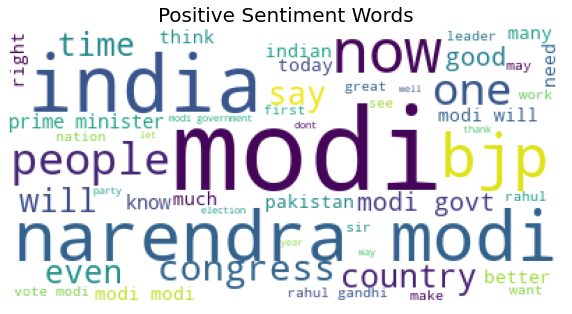

In [18]:
wordcount_gen(df, 'Positive')

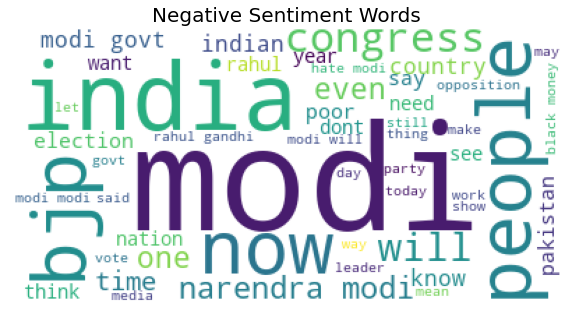

In [19]:
wordcount_gen(df, 'Negative')

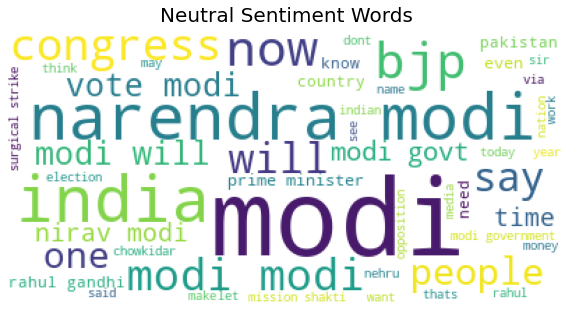

In [20]:
wordcount_gen(df, 'Neutral')

**Data Preprocessing**

In [21]:
def tweet_to_words(tweet):
  text = tweet.lower()
  text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
  words = text.split()
  words = [w for w in words if w not in stopwords.words('english')]
  words = [PorterStemmer().stem(w) for w in words]
  return words

In [22]:
print('\nOriginal tweet ->', df['clean_text'][0])
print('\nProcessed tweet ->', tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


**Apply data processing to each tweet**

In [23]:
X = list(map(tweet_to_words, df['clean_text']))

In [24]:
from sklearn.preprocessing import LabelEncoder

**Encode target labels**

In [43]:
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [25]:
print(X[0])
print(Y[0])

['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0


**Train and test split**

In [26]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

**Bag of words (BOW) feature extraction**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vocabulary_size = 5000
count_vector = CountVectorizer(max_features = vocabulary_size, preprocessor = lambda x: x, tokenizer = lambda x: x)
X_train = count_vector.fit_transform(X_train).toarray()
X_test = count_vector.transform(X_test).toarray()

In [28]:
print(count_vector.get_feature_names()[0:200])

['100', '1000', '10000', '108', '10th', '111', '1145', '11th', '1200', '12000', '125', '12k', '130', '140', '14000', '150', '1500', '1500000', '1520', '157200000', '15l', '15lac', '15lakh', '160', '180', '1947', '1958', '1962', '1969', '1971', '1980', '1984', '1990', '1991', '1998', '1st', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '201213', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2025', '2029', '21st', '23rd', '247', '24x7', '250', '2611', '26th', '272', '27th', '280319', '282', '28th', '29th', '2cr', '2day', '2nd', '300', '3000', '30000', '300km', '31st', '350', '35a', '370', '3rd', '400', '4000', '456', '4th', '500', '5000', '50000', '5th', '5year', '5yr', '600', '6000', '60yr', '6th', '72000', '7200000', '72k', '7th', '800', '8020', '9000', 'aab', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aalo', 'aam', 'aan', 'aap', 'aapk', 'aapko', 'aapn', 'aay', 'aaya', 'aayega', 'aayog', 'abandon', 'abdul', 'abdullah

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



**Plot the BoW feature vector**

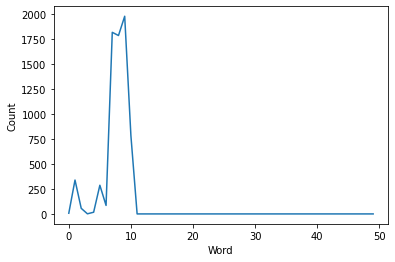

In [45]:
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

**Tokenizing and Padding**

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len = 50

In [30]:
def tokenize_pad_sequenes(text):
  tokenizer = Tokenizer(num_words = max_words, lower = True, split = ' ')
  tokenizer.fit_on_texts(text)
  X = tokenizer.texts_to_sequences(text)
  X = pad_sequences(X, padding = 'post', maxlen = max_len)
  return X, Tokenizer

In [31]:
print('Before Tokenization and Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequenes(df['clean_text'])
print('After Tokenization and Padding \n', X[0])

Before Tokenization and Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization and Padding 
 [  42    1  307   66 1726 1119   40 2378    2 1211  205    2  215   32
  155  100   49   69 1068  215   50    3    6  546    3   50 4179    3
 2806    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [32]:
import pickle

**Train and Test Split**

In [33]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (97781, 50) (97781, 3)
Validation Set -> (32594, 50) (32594, 3)
Test Set -> (32594, 50) (32594, 3)


In [34]:
import keras.backend as K

In [35]:
def f1_score(precision, recall):
  f1_val = 2 * precision * recall / (precision + recall + K.epsilon())
  return f1_val

**Bidirectional LSTM using NN**

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import losses 

In [37]:
vocab_size = 5000
embedding_size = 32
epochs = 10
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [38]:
sgd = SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [39]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length = max_len))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))

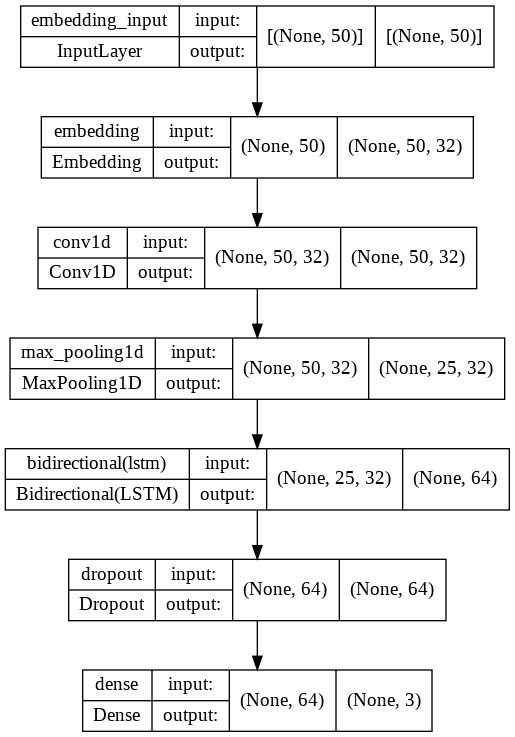

In [40]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes = True)

In [41]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f016f406450>>

In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer = sgd,
              metrics = ['accuracy', Precision(), Recall()])

In [46]:
batch_size = 64
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    batch_size = batch_size, 
                    epochs = epochs,
                    verbose = 1)

Epoch 1/20
1528/1528 [==============================] - 169s 110ms/step - loss: 0.9251 - accuracy: 0.5705 - precision: 0.6251 - recall: 0.4210 - val_loss: 0.7463 - val_accuracy: 0.6727 - val_precision: 0.7292 - val_recall: 0.5931
Epoch 2/20
1528/1528 [==============================] - 141s 93ms/step - loss: 0.6298 - accuracy: 0.7408 - precision: 0.7833 - recall: 0.6905 - val_loss: 0.5298 - val_accuracy: 0.7909 - val_precision: 0.8165 - val_recall: 0.7592
Epoch 3/20
1528/1528 [==============================] - 121s 79ms/step - loss: 0.5053 - accuracy: 0.8137 - precision: 0.8310 - recall: 0.7874 - val_loss: 0.4635 - val_accuracy: 0.8360 - val_precision: 0.8471 - val_recall: 0.8157
Epoch 4/20
1528/1528 [==============================] - 100s 65ms/step - loss: 0.4571 - accuracy: 0.8438 - precision: 0.8538 - recall: 0.8275 - val_loss: 0.4289 - val_accuracy: 0.8559 - val_precision: 0.8623 - val_recall: 0.8425
Epoch 5/20
1528/1528 [==============================] - 111s 73ms/step - loss: 0.42

**Model Accuracy and Loss**

In [44]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose = 0)
print('')
print('Accuracy: {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy: 0.8885
Precision : 0.8916
Recall    : 0.8850
F1 Score  : 0.8883


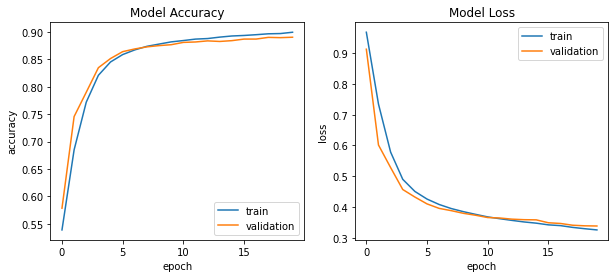

In [48]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

**Model Confusion Matrix**

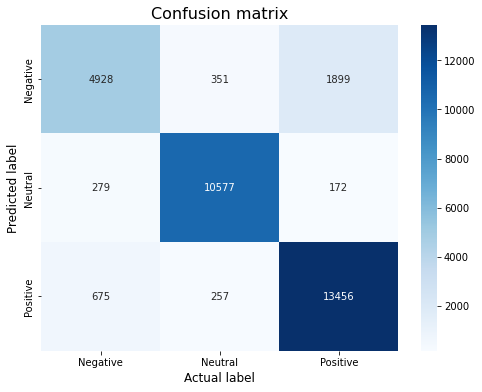

In [47]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
  sentiment_classes = ['Negative', 'Neutral', 'Positive']
  y_pred = model.predict(X_test)
  cm = confusion_matrix(np.argmax(np.array(y_test), axis = 1), np.argmax(y_pred, axis = 1))
  plt.figure(figsize = (8, 6))
  sns.heatmap(cm, cmap = plt.cm.Blues, annot = True, fmt = 'd',
              xticklabels = sentiment_classes,
              yticklabels = sentiment_classes)
  plt.title('Confusion matrix', fontsize = 16)
  plt.xlabel('Actual label', fontsize = 12)
  plt.ylabel('Predicted label', fontsize = 12)

plot_confusion_matrix(model, X_test, y_test)

In [47]:
from keras.models import load_model

**Function to predict sentiment class of the passed**

In [ ]:
def predict_class(text):
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [56]:
predict_class(['The food was meh'])

TypeError: ignored

In [54]:
predict_class(['"I hate when I have to call and wake people up'])

TypeError: ignored

**References**

https://www.kaggle.com/code/kritanjalijain/twitter-sentiment-analysis-lstm/notebook